<a href="https://colab.research.google.com/github/PedroDubas/Kaggle_Titanic/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
! unzip "/content/drive/My Drive/BasesMachineLearning/titanic.zip" -d "/content/"

Archive:  /content/drive/My Drive/BasesMachineLearning/titanic.zip
replace /content/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [26]:
import sys 
print("Python version: {}". format(sys.version))

import pandas as pd 
print("pandas version: {}". format(pd.__version__))

import matplotlib.pyplot as plt
import matplotlib
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np 
print("NumPy version: {}". format(np.__version__))

import scipy as sp 
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display 
print("IPython version: {}". format(IPython.__version__)) 

from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,train_test_split
from sklearn.feature_selection import RFECV,RFE
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score 
import sklearn 
print("scikit-learn version: {}". format(sklearn.__version__))

import re
print("re version: {}". format(re.__version__))

import seaborn as sns
print("seaborn version: {}". format(sns.__version__))


import random
import time


import warnings
warnings.filterwarnings('ignore')

Python version: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
pandas version: 0.24.2
matplotlib version: 3.0.3
NumPy version: 1.16.4
SciPy version: 1.3.0
IPython version: 5.5.0
scikit-learn version: 0.21.2
re version: 2.2.1
seaborn version: 0.9.0


In [11]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

fulldata = test
fulldata= fulldata.append(train)

print("Teste: {} \nTreino: {}\nFull_data:{}".format(test.shape,train.shape,fulldata.shape))

Teste: (418, 11) 
Treino: (891, 12)
Full_data:(1309, 12)


In [12]:
fulldata.isna().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [0]:
fulldata['Titulo']=fulldata.Name.apply(lambda x: re.search(' ([A-Za-z]+)\.', x)[1])

#fulldata['Titulo'].value_counts()

fulldata['Titulo'] = fulldata['Titulo'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], '0')
fulldata['Titulo'] = fulldata['Titulo'].replace(['Mr','Mrs','Mme'], '1')
fulldata['Titulo'] = fulldata['Titulo'].replace(['Miss','Ms','Mlle'], '2')
fulldata['Titulo'] = fulldata['Titulo'].replace('Master', '3')
#fulldata.Titulo.value_counts()

#fulldata.head(3)

fulldata.Sex = fulldata.Sex.astype('category')
fulldata.Sex = fulldata.Sex.cat.codes

fulldata.Embarked = fulldata.Embarked.astype('category')
fulldata.Embarked = fulldata.Embarked.cat.codes

fulldata['FamilySize'] = fulldata.Parch + fulldata.SibSp +1

fulldata['IsAlone'] = 0
fulldata.loc[fulldata['FamilySize'] == 1, 'IsAlone'] = 1

fulldata['CabinLetter']=fulldata.Cabin.str[0]
fulldata.CabinLetter = fulldata.CabinLetter.astype('category')
fulldata.CabinLetter = fulldata.CabinLetter.cat.codes

fulldata.loc[fulldata.Parch.isna(),'Parch'] = -1
fulldata.loc[fulldata.Fare.isna(),'Fare'] = -1

fulldata.head(3)

media = fulldata['Age'].mean()
std = fulldata['Age'].std()
qtdNull = fulldata['Age'].isnull().sum()
idade = np.random.randint(media - std, media + std, size=qtdNull)
fulldata['Age'][np.isnan(fulldata['Age'])] = idade
fulldata['Age'] = fulldata['Age'].astype(int)

In [14]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
fulldata = fulldata.drop(drop_elements, axis = 1)

fulldata = fulldata.astype('float32')
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 11 columns):
Age            1309 non-null float32
Embarked       1309 non-null float32
Fare           1309 non-null float32
Parch          1309 non-null float32
Pclass         1309 non-null float32
Sex            1309 non-null float32
Survived       891 non-null float32
Titulo         1309 non-null float32
FamilySize     1309 non-null float32
IsAlone        1309 non-null float32
CabinLetter    1309 non-null float32
dtypes: float32(11)
memory usage: 66.5 KB


In [15]:
train = fulldata[418:]
test = fulldata[:418]

print("Teste: {} \nTreino: {}\nFull_data:{}".format(test.shape,train.shape,fulldata.shape))

Teste: (418, 11) 
Treino: (891, 11)
Full_data:(1309, 11)


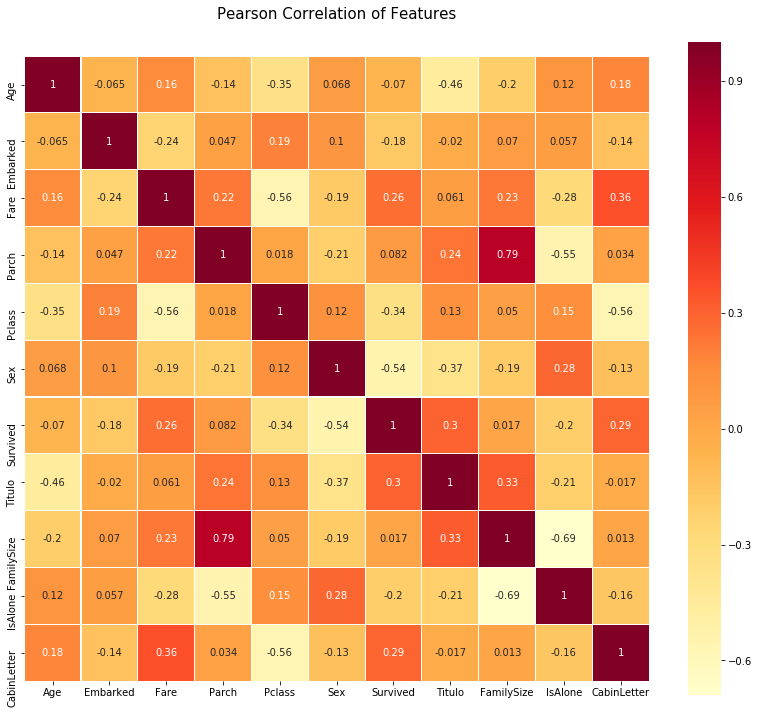

In [16]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(fulldata.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='YlOrRd', linecolor='white', annot=True)

In [22]:
test.head(3)

,Age,Embarked,Fare,Parch,Pclass,Sex,Titulo,FamilySize,IsAlone,CabinLetter
0,34.0,1.0,7.8292,0.0,3.0,1.0,1.0,1.0,1.0,-1.0
1,47.0,2.0,7.0000,0.0,3.0,0.0,1.0,2.0,0.0,-1.0
2,62.0,1.0,9.6875,0.0,2.0,1.0,1.0,1.0,1.0,-1.0


In [0]:
x = train.drop(['Survived'],axis =1)
y = train['Survived']
#test = test.drop(['Survived'],axis =1)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#Modelo


###Simple RandomForest

In [27]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=2, max_features=.5, random_state=42)

rf.fit(X_train,y_train)

predict_train = rf.predict(X_train)
predict_test = rf.predict(X_test)

print("Acc - Treino: ",accuracy_score(y_train, predict_train))
print("Acc - Teste : ",accuracy_score(y_test, predict_test))

Acc - Treino:  0.9221556886227545
Acc - Teste :  0.8251121076233184


###rfe Sample

In [28]:
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=2, max_features=.5, random_state=42)
rfe = RFE(model, step=1).fit(X_train, y_train)

predict_train_rfe = rfe.predict(X_train)
predict_test_rfe = rfe.predict(X_test)
print("Acc_rfe - Treino: ",accuracy_score(y_train, predict_train_rfe))
print("Acc_rfe - Teste : ",accuracy_score(y_test, predict_test_rfe))

Acc_rfe - Treino:  0.9251497005988024
Acc_rfe - Teste :  0.8161434977578476


Text(0.5, 1.0, 'feature importance')

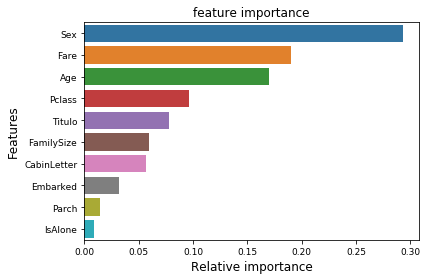

In [29]:
Importancia_variaveis = rf.feature_importances_
ordem = np.argsort(Importancia_variaveis)[::-1]
nomes = train.drop('Survived', axis=1).columns

g = sns.barplot(y=nomes[ordem],x = Importancia_variaveis[ordem] , orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("feature importance")

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    4.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend

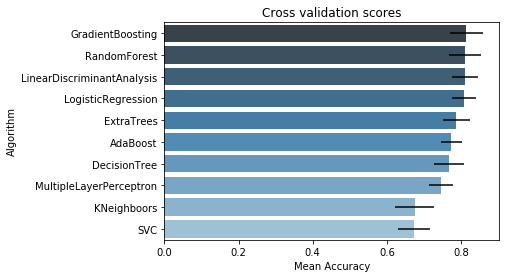

In [31]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4,verbose = 2))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({
    "CrossValMeans":cv_means,
    "CrossValerrors": cv_std,
    "Algorithm":["SVC","DecisionTree","AdaBoost",
                 "RandomForest","ExtraTrees","GradientBoosting",
                 "MultipleLayerPerceptron","KNeighboors",
                 "LogisticRegression","LinearDiscriminantAnalysis"]
})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res.sort_values(by='CrossValMeans', ascending=False), palette="Blues_d",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

##  Decision Tree

In [32]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 888 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    6.9s finished


0.7934131736526946

##ExtraTrees

In [0]:
ExtC = ExtraTreesClassifier()

ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

##RandomForest

In [0]:
RFC = RandomForestClassifier()

rf_param_grid = {"max_depth": [None],
              "max_features": [1,2,3,4,.5,.3],
              "min_samples_split": [6, 10,12,14],
              "min_samples_leaf": [1,2,3, 10],
              "bootstrap": [False],
              "n_estimators" :[80,100,120,200],
              "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

## Gradient boosting

In [0]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1]
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

## SVC classifier

In [0]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,y_train)


gsSVMC

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=kfold)

In [0]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='hard', n_jobs=4)

votingC = votingC.fit(X_train, y_train)
votingC

kaggle_sub = pd.read_csv("gender_submission.csv")

test_Survived = pd.Series(votingC.predict(test), name="Survived").astype(int)

results = pd.concat([kaggle_sub.PassengerId,test_Survived],axis=1)

results.to_csv("Meu_RFC_V6.csv",index=False)

preds_train_rfc = gsRFC.predict(train.drop('Survived', axis=1))
preds_rfc = gsRFC.predict(test)
accuracy_score(train['Survived'], preds_train_rfc)

test_Survived.astype(int)

